## 最大化 $f(x,y)=x^2y$ 
满足$x^2+y^2=1$

In [61]:
import numpy as np
import ipyvolume as ipv
import ipyvolume.pylab as plt3d

In [62]:
f = lambda X: X[0]**2 * X[1]
g = lambda X: X[0]**2 + X[1]**2 - 1

In [63]:
xn = np.linspace(-3, 3, 50)  
yn = np.linspace(-3, 3, 50)  
xxn, yyn = np.meshgrid(xn, yn) 
fn = f([xxn, yyn])
gn = g([xxn, yyn])

plt3d.figure(width=1000, height=600)
plt3d.plot_surface(xxn, fn, yyn, color="green")
plt3d.plot_wireframe(xxn, gn, yyn, color="blue")
plt3d.zlabel("y")
plt3d.ylabel("z")
plt3d.show()

In [64]:
import matplotlib.pyplot as plt

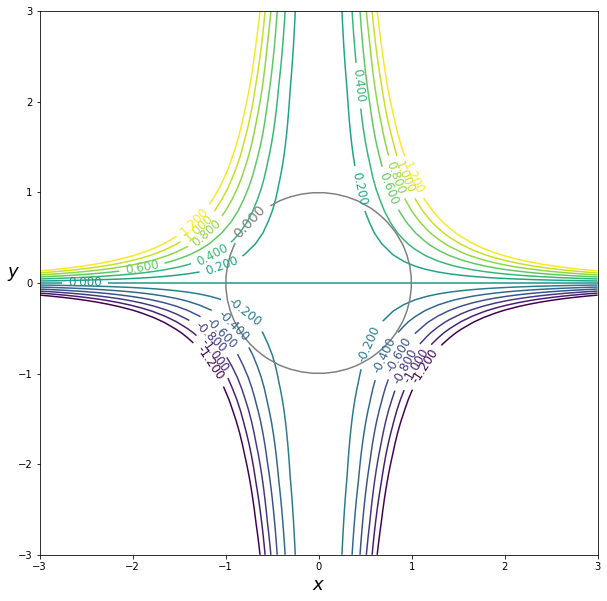

In [65]:
# 将f投影到约束平面
fig = plt.figure(figsize=(10, 10))  
ax = fig.add_subplot(111)  
cs = ax.contour(xxn, yyn, fn, levels=np.arange(-1.3, 1.3, 0.1)[1::2])
ax.clabel(cs, fontsize=12)
cs0 = ax.contour(xxn, yyn, gn, levels=0, colors='gray')
ax.clabel(cs0, fontsize=14)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
plt.show()  

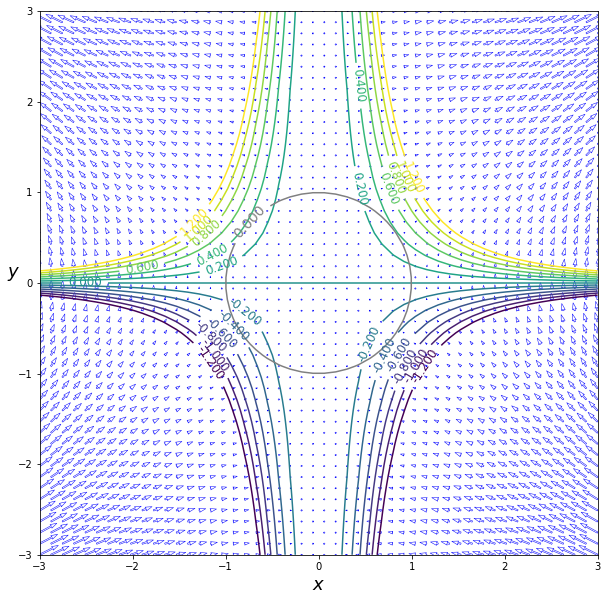

In [66]:
# 绘制优化函数f的梯度场
x_grad = 2 * xxn * yyn
y_grad = xxn**2

fig = plt.figure(figsize=(10, 10))  
ax = fig.add_subplot(111)  
cs = ax.contour(xxn, yyn, fn, levels=np.arange(-1.3, 1.3, 0.1)[1::2])
ax.clabel(cs, fontsize=12)
cs0 = ax.contour(xxn, yyn, gn, levels=0, colors='gray')
ax.clabel(cs0, fontsize=14)
ax.quiver(xxn, yyn, x_grad, y_grad, edgecolor='b', facecolor='None', linewidth=0.5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
plt.show() 

### 符号法

In [67]:
import sympy
sympy.init_printing()

In [68]:
x, y =sympy.symbols("x, y")
f_sym = x**2 * y
f_grad = sympy.Matrix([f_sym.diff(i) for i in (x,y)])

g_sym = x**2 + y**2 - 1
g_grad = [g_sym.diff(i) for i in (x,y)]
lamb = sympy.Symbol("lambda")

lagrange_eq = f_grad - sympy.Matrix([lamb*g for g in g_grad])
lagrange_eq

⎡-2⋅λ⋅x + 2⋅x⋅y⎤
⎢              ⎥
⎢           2  ⎥
⎣ -2⋅λ⋅y + x   ⎦

In [69]:
roots = sympy.solve([lagrange_eq[0], lagrange_eq[1], g_sym], (x, y, lamb))
roots

In [70]:
res_dict = [{x:r[0], y:r[1], lamb:r[2]} for r in roots]
f_values = [f_sym.subs(r) for r in res_dict]
f_values

In [71]:
f_values1 = np.array(f_values)
roots_float = np.array([[r[0].evalf(), r[1].evalf()] for r in roots])
res_max = roots_float[np.where(f_values1 == max(f_values1))[0]].astype("float")
res_max       

array([[-0.81649658,  0.57735027],
       [ 0.81649658,  0.57735027]])

In [72]:
for r in res_max:
    print("最大值点: x={}, y={}, f_max={}".format(r[0], r[1], f(r)))

最大值点: x=-0.816496580927726, y=0.5773502691896257, f_max=0.38490017945975047
最大值点: x=0.816496580927726, y=0.5773502691896257, f_max=0.38490017945975047


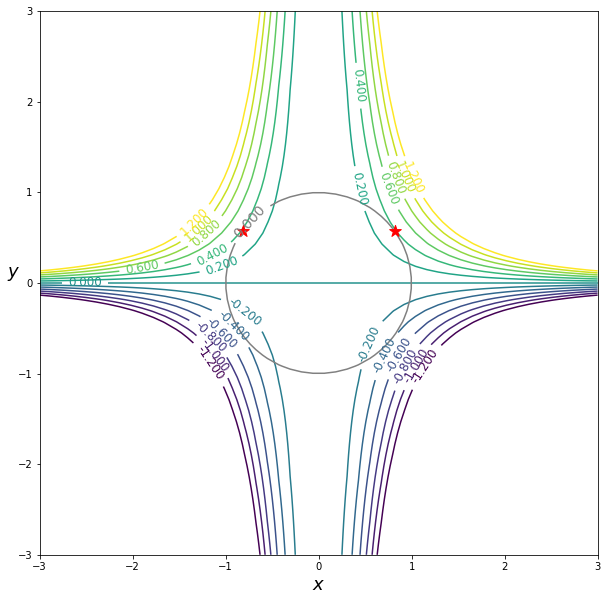

In [73]:
fig = plt.figure(figsize=(10, 10))  
ax = fig.add_subplot(111)  
cs = ax.contour(xxn, yyn, fn, levels=np.arange(-1.3, 1.3, 0.1)[1::2])
ax.clabel(cs, fontsize=12)
cs0 = ax.contour(xxn, yyn, gn, levels=0, colors='gray')
ax.clabel(cs0, fontsize=14)
for r in res_max:
    ax.scatter(r[0], r[1], color='r', marker='*', s=150, zorder=3)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", rotation=0, fontsize=18)
plt.show()  

In [54]:
plt3d.figure(width=1000, height=600)
plt3d.plot_surface(xxn, fn, yyn, color="green")
plt3d.plot_wireframe(xxn, gn, yyn, color="blue")
for r in res_max:
    plt3d.scatter(np.array([r[0]]), np.array([r[1]]), np.array([f(r)]),
                  c='r', size=5)
plt3d.zlabel("y")
plt3d.ylabel("z")
plt3d.show()

### 数值法

In [30]:
from scipy import optimize
from scipy.optimize import NonlinearConstraint

In [31]:
f = lambda X: -X[0]**2 * X[1]
nonlinear_constraint = NonlinearConstraint(g, 0., 0.)
results1 = optimize.minimize(f, x0=[0.1, 0.1], method='trust-constr', constraints=[nonlinear_constraint])
results1

         cg_niter: 7
     cg_stop_cond: 1
           constr: [array([8.57092175e-14])]
      constr_nfev: [24]
      constr_nhev: [0]
      constr_njev: [0]
   constr_penalty: 3.933388192435791
 constr_violation: 8.570921750106208e-14
   execution_time: 0.1020057201385498
              fun: -0.38490017945979993
             grad: array([-0.94280905, -0.66666667])
              jac: [array([[1.63299318, 1.15470055]])]
  lagrangian_grad: array([ 1.46030987e-09, -2.06518946e-09])
          message: '`gtol` termination condition is satisfied.'
           method: 'equality_constrained_sqp'
             nfev: 24
             nhev: 0
              nit: 8
            niter: 8
             njev: 0
       optimality: 2.0651894638845647e-09
           status: 1
          success: True
        tr_radius: 5.600054687249311
                v: [array([0.57735027])]
                x: array([0.81649658, 0.57735027])

In [60]:
results1.x, results1.fun

(array([0.81649658, 0.57735027]), -0.38490017945979993)

In [57]:
results2 = optimize.minimize(f, x0=[-0.1, 0.1], method='trust-constr', constraints=[nonlinear_constraint])
results2

         cg_niter: 7
     cg_stop_cond: 1
           constr: [array([8.57092175e-14])]
      constr_nfev: [24]
      constr_nhev: [0]
      constr_njev: [0]
   constr_penalty: 3.933388192435791
 constr_violation: 8.570921750106208e-14
   execution_time: 0.17000985145568848
              fun: -0.38490017945979993
             grad: array([ 0.94280905, -0.66666667])
              jac: [array([[-1.63299318,  1.15470055]])]
  lagrangian_grad: array([-1.46030987e-09, -2.06518946e-09])
          message: '`gtol` termination condition is satisfied.'
           method: 'equality_constrained_sqp'
             nfev: 24
             nhev: 0
              nit: 8
            niter: 8
             njev: 0
       optimality: 2.0651894638845647e-09
           status: 1
          success: True
        tr_radius: 5.600054687249311
                v: [array([0.57735027])]
                x: array([-0.81649658,  0.57735027])

In [59]:
results2.x, results2.fun

(array([-0.81649658,  0.57735027]), -0.38490017945979993)